 The Credit Card Transaction Data have 29 features and 284k+ samples. 
 In the project, I first used logistic regression and reached 68% accuracy. 
 Later, I standardized the amount of transferred money, oversampled the data and implemented a MLPC classifier which relies on an underlying Neural Network to train and predict the fraud transaction. The accuracy boosted to 97%. 

In [ ]:
import numpy as np
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### how many transcation are fraud and not fraud?

In [3]:
class_names = {0:'Not Fraud', 1:'Fraud'}
print(data.Class.value_counts().rename(index = class_names))

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


(array([3.6737e+04, 3.8948e+04, 6.3477e+04, 5.8125e+04, 5.0635e+04,
        2.5787e+04, 9.0710e+03, 1.8090e+03, 2.1000e+02, 8.0000e+00]),
 array([ 0.        ,  1.01539412,  2.03078823,  3.04618235,  4.06157647,
         5.07697058,  6.0923647 ,  7.10775882,  8.12315293,  9.13854705,
        10.15394117]),
 <BarContainer object of 10 artists>)

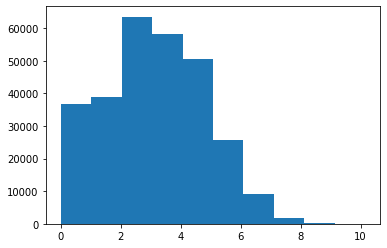

In [4]:
plt.hist(np.log(data['Amount']+1))

## Using Logistic Regression

In [6]:
from sklearn.model_selection import train_test_split

In [10]:
feature_names = data.iloc[:, 1:30].columns
target = data.iloc[:, 30: ].columns
print(feature_names)
print(target)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Class'], dtype='object')


In [11]:
data_features = data[feature_names]
data_target = data[target]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, train_size=0.70, test_size=0.30, random_state=1)

In [37]:
print("Length of X_train is: {X_train}".format(X_train = len(X_train)))
print("Length of X_test is: {X_test}".format(X_test = len(X_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))

Length of X_train is: 199364
Length of X_test is: 85443
Length of y_train is: 199364
Length of y_test is: 85443


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [39]:
y_train['Class'].to_numpy()

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
y_train.values.ravel()

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
model = LogisticRegression(solver = 'liblinear', max_iter=200)
model.fit(X_train, y_train['Class'].to_numpy())

LogisticRegression(max_iter=200, solver='liblinear')

I set the solver as liblinear which is a linear classification that supports logistic regression and increase the max number of maximum iteration. 

In [47]:
pred = model.predict(X_test)

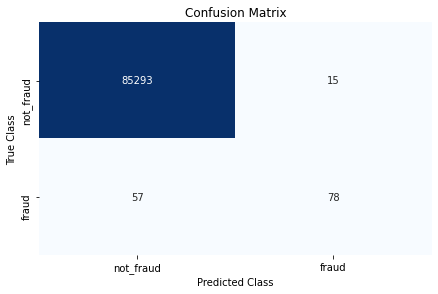

In [50]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [51]:
dataframe

,not_fraud,fraud
not_fraud,85293,15
fraud,57,78


In [52]:
from sklearn.metrics import f1_score, recall_score
f1_score = round(f1_score(y_test, pred), 2)
recall_score = round(recall_score(y_test, pred), 2)
print("Sensitivity/Recall for Logistic Regression Model 1 : {recall_score}".format(recall_score = recall_score))
print("F1 Score for Logistic Regression Model 1 : {f1_score}".format(f1_score = f1_score))

Sensitivity/Recall for Logistic Regression Model 1 : 0.58
F1 Score for Logistic Regression Model 1 : 0.68


## Using undersampling and neuron network 

In [54]:
from sklearn.preprocessing import StandardScaler
# standardize the amount of money of each transaction
data['normAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape (-1,1))
data = data.drop (['Time', 'Amount'], axis = 1);

In [55]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [56]:
# the total number of fraud transaction
number_records_fraud = len (data[data.Class==1])
# the indices of fraud and non-fraud case
fraud_indices = np.array (data[data.Class==1].index)
normal_indices = np.array (data[data.Class==0].index)

In [57]:
# randomly select non-fraud transaction which has the same amount as the fraud transaction
random_normal_indices = np.random.choice (normal_indices, number_records_fraud, replace = False )
# after undersampling, concatenate fraud and randomly-selected non-fraud case
under_sample_indices = np.concatenate ([fraud_indices, random_normal_indices])
# the undersampled total data
under_sample_data = data.iloc[under_sample_indices,:]

In [59]:
# X and y
X_undersample = under_sample_data.iloc [:, under_sample_data.columns != 'Class'];
y_undersample = under_sample_data.iloc [:, under_sample_data.columns == 'Class'];

In [73]:
# split original data into a train set and a test set
# split undersampled data into a train set and a test set
X_train, X_test, y_train, y_test = train_test_split (X,y, test_size = 0.3, random_state = 0)
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split (X_undersample,y_undersample, test_size = 0.3, random_state = 0)

In [74]:
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier

In [76]:
# use unersampled data to train the MLPC Classifier and predict the original test set
MLPC = MLPClassifier(hidden_layer_sizes=(200,), max_iter=1000)
MLPC.fit(X_train_under, y_train_under.to_numpy().ravel())
y_pred = MLPC.predict(X_test)
# recall
recall_acc = round(recall_score(y_test,y_pred), 4)
recall_acc 

0.966